In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv("Tesla_stock_Price.csv")

In [3]:
data.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,1-Apr-11,1.78,1.83,1.88,1.77,42.98M,-3.78%
1,1-Apr-13,2.93,2.82,3.11,2.78,211.59M,15.81%
2,1-Apr-14,14.46,13.93,14.54,13.91,110.57M,4.03%
3,1-Apr-15,12.51,12.58,12.82,12.4,56.92M,-0.56%
4,1-Apr-16,15.84,16.32,16.53,15.55,239.96M,3.39%


In [4]:
data.isnull().sum()

Date        0
Price      80
Open       80
High       80
Low        80
Volume     80
Chg%      120
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3258 entries, 0 to 3257
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3258 non-null   object 
 1   Price   3178 non-null   float64
 2   Open    3178 non-null   float64
 3   High    3178 non-null   float64
 4   Low     3178 non-null   object 
 5   Volume  3178 non-null   object 
 6   Chg%    3138 non-null   object 
dtypes: float64(3), object(4)
memory usage: 178.3+ KB


In [6]:
data.select_dtypes(include="float64").columns

Index(['Price', 'Open', 'High'], dtype='object')

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
si = SimpleImputer(strategy="mean") 
ar = si.fit_transform(data[['Price', 'Open', 'High']])

In [9]:
data = pd.DataFrame(ar,columns = data.select_dtypes(include="float64").columns)

In [10]:
data.isnull().sum()

Price    0
Open     0
High     0
dtype: int64

In [11]:
data.select_dtypes(include="object").columns

Index([], dtype='object')

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
si = SimpleImputer(strategy="mean") 
ar = si.fit_transform(data[['Price', 'Open', 'High']])

In [14]:
data = pd.DataFrame(ar,columns = data.select_dtypes(include="float64").columns)

In [15]:
data.isnull().sum()

Price    0
Open     0
High     0
dtype: int64

# anomany detection

In [16]:
data.shape

(3258, 3)

In [17]:
q1 = data['Price'].quantile(0.25) 
q3 = data['Price'].quantile(0.75)

In [18]:
IQR = q3 - q1

In [19]:
min_range = q1 - (1.5*IQR) 
max_range = q3 + (1.5*IQR) 
min_range,max_range

(-46.037499999999994, 102.60249999999999)

In [20]:
data = data[data['Price']<=max_range]

In [21]:
data.shape

(2621, 3)

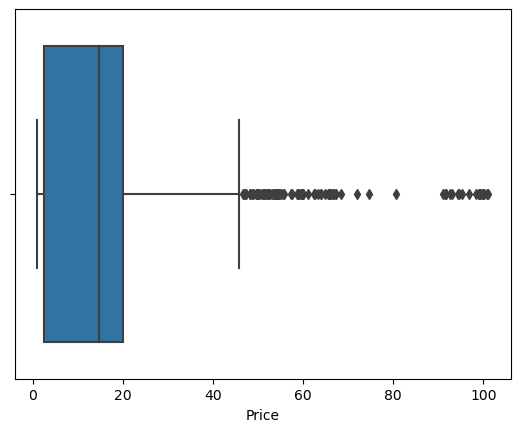

In [22]:
sns.boxplot(x = 'Price',data=data) 
plt.show()

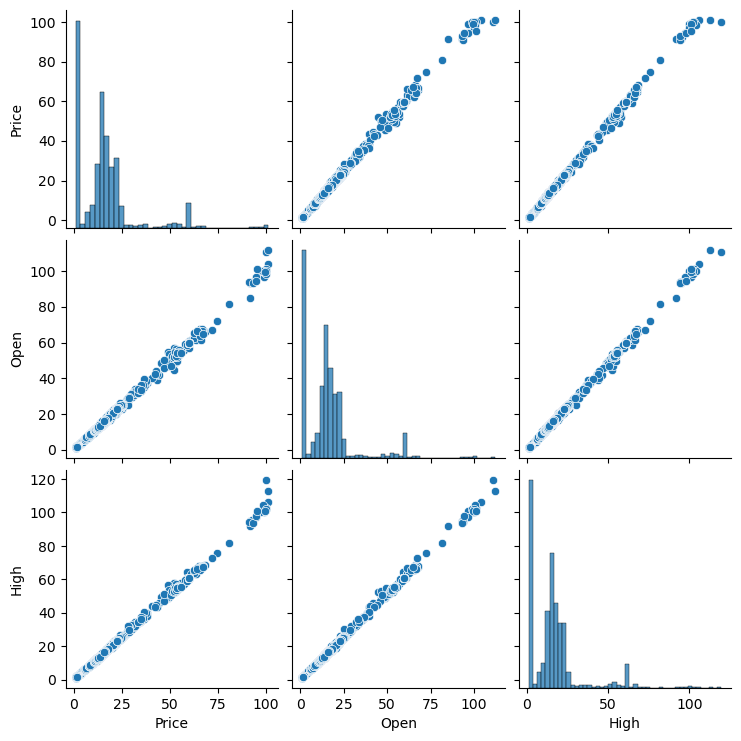

In [27]:
sns.pairplot(data) 
plt.show()